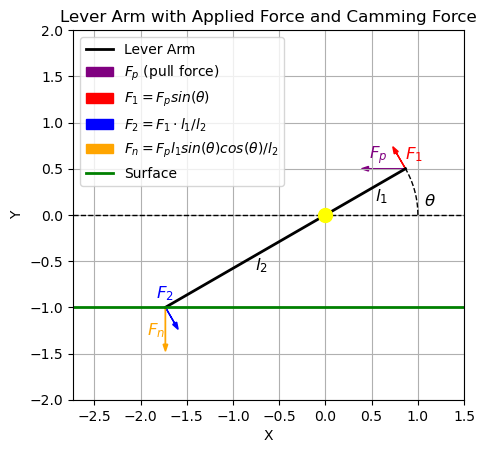

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
l1 = 1  # Length from pivot to applied force point
l2 = 2  # Length from pivot to point of contact
theta = np.radians(30)  # Angle in degrees

# Calculate the opposite angle and perpendicular angles
theta_opp = theta + np.pi
theta_perp1 = theta + np.pi / 2
theta_perp2 = theta_opp + np.pi / 2

# Calculate the position of points using the corrected angles
pivot = np.array([0, 0])
end1 = np.array([l1 * np.cos(theta), l1 * np.sin(theta)])  # Point where f1 is applied
end2 = np.array([l2 * np.cos(theta_opp), l2 * np.sin(theta_opp)])  # Point of contact with surface

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the lever arm
ax.plot([pivot[0], end1[0]], [pivot[1], end1[1]], 'k-', lw=2, label='Lever Arm')
ax.plot([pivot[0], end2[0]], [pivot[1], end2[1]], 'k-', lw=2)

# Plot the forces using the correct perpendicular angles
ax.arrow(end1[0], end1[1], -0.2 / np.sin(theta), 0, head_width=0.05, color='purple', label=r'$F_p$ (pull force)') # Plot the applied force F_p along the x-axis in the negative direction
ax.arrow(end1[0], end1[1], 0.2 * np.cos(theta_perp1), 0.2 * np.sin(theta_perp1), head_width=0.05, color='r', label=r'$F_1 = F_p sin(\theta)$')
ax.arrow(end2[0], end2[1], 0.2 * np.cos(theta_perp2), 0.2 * np.sin(theta_perp2), head_width=0.05, color='b', label=r'$F_2 = F_1 \cdot l_1 / l_2$')
ax.arrow(end2[0], end2[1], 0, -0.2 / np.sin(theta), head_width=0.05, color='orange', label=r'$F_n = {F_p l_1 sin(\theta) cos(\theta)} / l_2$') # Plot the normal force F_n along the negative y-axis


# Plot the surface in contact with the end of segment l2
surface_y = end2[1]
ax.plot([end2[0] - 1, 1.5], [surface_y, surface_y], 'g-', lw=2, label='Surface')

# Set labels and title
ax.text(end1[0], end1[1] + 0.1, r'$F_1$', fontsize=12, color='r')
ax.text(end2[0] - 0.1, end2[1] + 0.1, r'$F_2$', fontsize=12, color='b')
ax.text(end1[0] - 0.4, end1[1] + 0.1, r'$F_p$', fontsize=12, color='purple')
ax.text(end2[0] - 0.2, end2[1] - 0.3, r'$F_n$', fontsize=12, color='orange')
ax.text(end1[0]+ 0.2, 0.1, r'$\theta$', fontsize=12, color='k')
ax.text(end1[0]/2 + 0.1, end1[1]/2 - 0.1, r'$l_1$', fontsize=12, color='black')
ax.text(end2[0]/2 + 0.1, end2[1]/2 - 0.1, r'$l_2$', fontsize=12, color='black')

# Adding angle arc
arc = np.linspace(0, theta, 100)
ax.plot(l1 * np.cos(arc), l1 * np.sin(arc), 'k--', lw=1)

# Add a yellow circle at the pivot point
ax.scatter(pivot[0], pivot[1], color='yellow', s=100, zorder=5)  

# Add a black dashed line along the x-axis
ax.axhline(y=pivot[1], color='black', linestyle='--', linewidth=1)  


# Set the limits and labels
ax.set_xlim(end2[0] - 1, 1.5)
ax.set_ylim(surface_y - 1, 2)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lever Arm with Applied Force and Camming Force')

# Show grid and legend
ax.grid(True)
ax.legend()
plt.show()

In [2]:
import sympy as sp

# Define the symbols
l1, l2, f1, f2, fp, theta = sp.symbols('l1 l2 f1 f2 fp theta')

# relation of f1 to fp
f1 = fp * sp.sin(theta)

# Torque generated by the applied force f1
tau = f1 * l1

# Force at the contact point f2 which is all torque.
f2_expr = tau / l2

# Components of f2
f2_normal = f2_expr * sp.cos(theta)
f2_tangential = f2_expr * sp.sin(theta)

# Display the expressions


In [3]:
f2_expr 

fp*l1*sin(theta)/l2

In [4]:
f2_normal

fp*l1*sin(theta)*cos(theta)/l2

In [5]:
f2_tangential

fp*l1*sin(theta)**2/l2

##### Variables

$
F_p, F_n, \theta
$

##### Assumptions 
1. Represent the cam as two lever arms connected as indicated, making angle $\theta$ with the surfaces of contact. Angles of contact on each side of cam are equal.
2. Surfaces are immovable, and caming arms are incompressible/inextensible, thus constraining the geometry such that the configuration is static, and the forces must balance. 
2. The point of contact of the caming arms with vertical surface is constrained, that is, no translation is possible, only rotation at this point. (This is equivalent to assuming infinite friction, or a no-slipping condition.) This implies that the leverage force of each cam arm on the surface is perpendicular to the plane of the cam arm as indicated.


##### Equations
Horizontal and Vertical Components of $F_n$

$
\text{(1)\qquad} F_{n,h} = F_n \sin(\theta)
$

$
\text{(2)\qquad} F_{n,v} = F_n \cos(\theta)
$

Equations for $F_n$ and $F_p$ in terms of $F_{n,v}$

$
\text{(3)\qquad} F_n = \frac{F_{n,v}}{\cos(\theta)}
$

$
\text{(4)\qquad} F_p = 2 F_{n,v} \quad \Rightarrow \quad F_{n,v} = \frac{1}{2} F_p
$

Substituting expression (4) for $F_{n,v}$ in terms of $F_p$ into expression for (3) for $F_n$

$
\text{(5)\qquad} F_n = \frac{\frac{1}{2} F_p}{\cos(\theta)}
$

Final Expression for $F_{n,h}$ substituting expression (5) into expression (1)

$
\text{(6)\qquad} F_{n,h} =  \frac{\frac{1}{2}F_p}{\cos(\theta)} \cdot \sin(\theta) = \frac{1}{2} F_p \tan(\theta)
$

Conclusion

$
\text{The outward force on each wall is } \frac{1}{2} F_p \tan(\theta).
$

### Force Analysis for a Cam-Based System

### Summary of analysis
A simplified analysis of caming forces for a SLCD, focusing on the relationship between the applied downward force $F_p$, the camming angle $\theta$ (which measures the angle from the pivot point of the cam to the point of contact on the surface, *not* the degree of contraction of the cam), and the resulting outward force $F_{c,x}$, assuming no slipping. It was found that as the camming angle $\theta$  decreases, the outward force $F_{c,x}$ increases significantly, and thus should increase frictional resistance against the rock surface. The outward expansive force is given by by $ F_{c,x} = \frac{F_p}{4 \cdot \tan(\theta)} $ for a 4 lobed cam in a symmetric parallel sided placement. The outward force varies proportionately to the downward force $F_p$ and inversly proportionally to $ \tan(\theta) $. From quick inspection, it appears that Black Diamond C4 cams are designed to maintain a fairly consistent and low camming angle (perhaps $15-20^o$) throughout their range of camming, and that the offset double axle works to decrease the camming angle. Considerations of when slipping will occur based on friction are considered at the close.

![Cam Forces Diagram](diagrams/cam_force_diagram.png)

### Assumptions

- The rock surfaces are immovable; they cannot translate or rotate. (In reality, the possibility of rock failure exists.)
- A simplified cam arm (straight line) is used to model a cam lobe. This should be a decent approximation given a rigid cam lobe. 
- The cam rotation axis is assumed to be at the center where the force is applied. For offset double axle cams, the force distribution is offset, however assuming a rigid structure, this force will translate to the cam pivot point and the analysis will be unchanged (if we measure the camming angle from cam axle to where the cam lobe meets rock surface).
- There is no slipping at the contact points between the cam arms and the walls; the contact points are effectively fixed pivots. This is equivalent to perfect or infinite friction.
- The cam arms are assumed to make point contact with the rock. In reality there will be a surface zone of contact and pressure forces over that surface will be distributed in potentially complex ways.
- We begin by studying a simplified two lobe system. Extending to four lobes is considered is straightforward and added in the following section.
- The cam arms (and other cam components) are rigid and incompressible, meaning their length remains constant and they cannot deform.
- The system is symmetric, so the forces on the left and right cam arms are equal in magnitude.
- The cam arms remain attached at the central point where the force $F_p$ is applied. 
- The force $F_p$ is applied directly downward at the central point where the cam arms meet.

Let:
- $F_p$ be the downward force at the central pivot point.
- $\theta$ be the angle of the camming arm relative to horizontal.
- $F_c$ be the distributed force along cam arm.
- $F_w$ be the balancing force exerted by the rock surface on each cam arm.

#### Horizontal (Outward) Force Balance

The horizontal component of the force exerted by the rock surface on each cam arm is:

$$
F_{w,x} = F_c \cdot \cos(\theta)
$$

For static equilibrium, the horizontal components on both sides must be equal in magnitude:

$$
F_{w,x,\text{left}} = F_{w,x,\text{right}}
$$

#### Vertical (Downward) Force Balance

The vertical component of the force exerted by the rock surface on each cam arm is:

$$
F_{w,y} = F_c \cdot \sin(\theta)
$$

For static equilibrium, the sum of the vertical components must balance the downward force $F_p$:

$$
2 \cdot F_{w,y} = F_p
$$

Substituting $F_{w,y} = F_c \cdot \sin(\theta)$:

$$
2 \cdot F_c \cdot \sin(\theta) = F_p
$$

Thus, the force along the cam arm is:

$$
F_c = \frac{F_p}{2 \cdot \sin(\theta)}
$$

### Decomposition of the force $ F_c $

The force $ F_c $ along the cam arm can be decomposed into horizontal (outward) and vertical (downward) components:

- **Outward Component $ F_{c,x} $**:
  
  The outward component of $ F_c $ is given by:
  
  $$
  F_{c,x} = F_c \cdot \cos(\theta)
  $$
  
- **Downward Component $ F_{c,y} $**:

  The downward component of $ F_c $ must be such that it balances F_p, as already seen,
  
  $$
  F_{c,y} = \frac{F_p}{2} 
  $$

To find the outward component, substitute the expression for $ F_c $ from above:

$$
F_c = \frac{F_p}{2 \cdot \sin(\theta)}
$$

giving:

- **Outward Component**:
  
  $$
  F_{c,x} = \frac{F_p}{2 \cdot \sin(\theta)} \cdot \cos(\theta) = \frac{F_p \cdot \cos(\theta)}{2 \cdot \sin(\theta)} = \frac{F_p}{2 \cdot \tan(\theta)}
  $$

- **Downward Component**:
  
  $$
  F_{c,y} =\frac{F_p}{2}
  $$

Thus, the force $ F_c $ is decomposed into:

- Outward component: $ F_{c,x} = \frac{F_p}{2 \cdot \tan(\theta)} $
- Downward component: $ F_{c,y} = \frac{F_p}{2} $

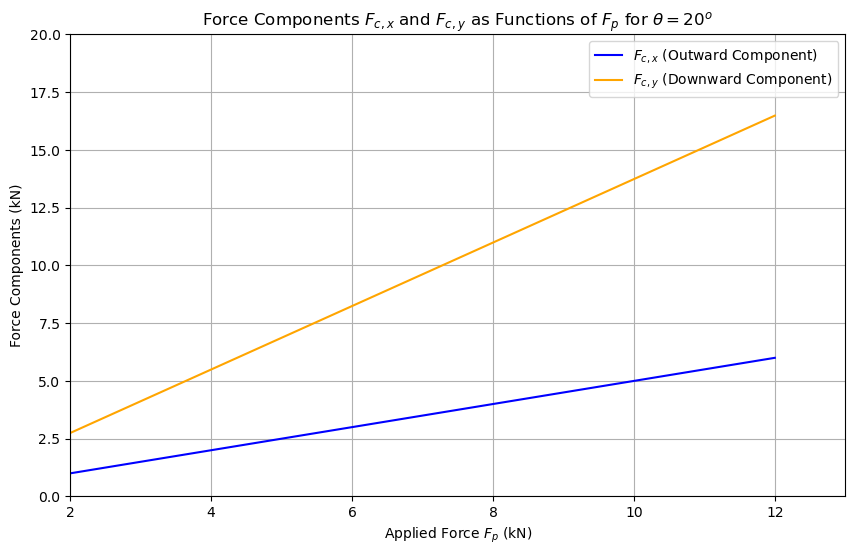

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
theta = np.radians(20)  # Example angle in degrees, convert to radians

# Force range (F_p) from 1 kN to 12 kN
F_p = np.linspace(2e3, 12e3, 100)  # Force in Newtons

# Calculate F_c,x and F_c,y
F_c_x = F_p / 2  # F_c,x as a function of F_p
F_c_y = F_p / (2 * np.tan(theta))  # F_c,y as a function of F_p

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(F_p / 1e3, F_c_x / 1e3, label=r'$F_{c,x}$ (Outward Component)', color='blue')
plt.plot(F_p / 1e3, F_c_y / 1e3, label=r'$F_{c,y}$ (Downward Component)', color='orange')
plt.xlim(2, 13)  # Set x-axis limits 
plt.ylim(0, 20)  # Set y-axis limits 
plt.xlabel('Applied Force $F_p$ (kN)')
plt.ylabel('Force Components (kN)')
plt.title(r'Force Components $F_{c,x}$ and $F_{c,y}$ as Functions of $F_p$ for $\theta = 20^o$')
plt.legend()
plt.grid(True)
plt.show()

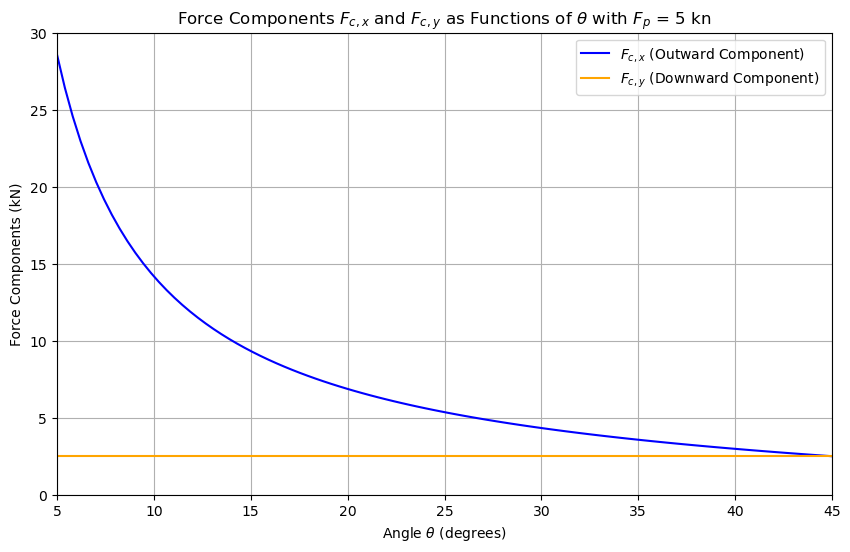

In [3]:
# Constants
F_p = 5e3  # Applied force fixed at 5 kN (5000 N)
theta = np.radians(np.linspace(5, 45, 100))  # Theta ranging from 5 degrees to 45 degrees

# Calculate F_c,x and F_c,y
F_c_x = F_p / (2 * np.tan(theta))  # F_c,x as a function of theta
F_c_y = np.linspace(F_p / 2, F_p /2, 100) * theta / theta # F_c,y as a function of theta

# Convert theta to degrees for plotting
theta_degrees = np.degrees(theta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_degrees, F_c_x / 1e3, label=r'$F_{c,x}$ (Outward Component)', color='blue')
plt.plot(theta_degrees, F_c_y / 1e3, label=r'$F_{c,y}$ (Downward Component)', color='orange')
plt.xlim(5, 45)  # Set x-axis limits 
plt.ylim(0, 30)  # Set y-axis limits 
plt.xlabel('Angle $\\theta$ (degrees)')
plt.ylabel('Force Components (kN)')
plt.title(r'Force Components $F_{c,x}$ and $F_{c,y}$ as Functions of $\theta$ with $F_p$ = 5 kn')
plt.legend()
plt.grid(True)
plt.show()

### Observations and Commentary

#### Force Distribution and Balance
-  There is a simple relationship between the applied force $ F_p $, the angle $ \theta $ of the cam arms, and the resulting forces $ F_{c,x} $ and $ F_{c,y} $.
- The vertical components of the forces $ F_{c,y} $ must balance the downward force $ F_p $ to ensure static equilibrium.
- The horizontal components $ F_{c,x} $, which exert outward pressure against the rock, are sensitive to the angle $ \theta $. As $ \theta $ decreases, the outward force increases significantly. (Note that the camming angle is *NOT* the same as the percentage of camming, e.g. from fully open to fully cammed).
- The amount of camming (between open and fully cammed) only affects the system if it changes the camming angle $\theta$, that is the angle from the pivot point to the point where the lobe contacts the surface it is cammed against.

#### Behavior as $ \theta $ Approaches Extremes
- When $ \theta $ approaches zero, the system exhibits a dramatic increase in the outward force $ F_{c,x} $. This suggests that a cam with too small a camming angle may create too great an outward force.
- Conversely, as $ \theta $ increases (steeper camming angle), the outward force diminishes, this in turn would reduce the available friction force to maintain cam placement. 
- This suggest that there may be an ideal camming angle. From a cursory look at modern Black Diamond C4 cams with a double axle, it appears that the contact point with the surface remains approximately constant (perhaps $15-20^o$) throughout the camming range due to the cam lobe shape and axle offset. It appears that there may be an ideal camming angle which generates significan force to maintain friction contact with the rock and counteract the downward put.

#### Considering Four Lobes

- The current analysis focuses on a simplified model. In a four-lobed cam, the applied force $ F_p $ is distributed among all four lobes (or in the case of a metolius tri-lobed cam, the factor would be 3 in the discussion below).
- Assuming a symmetric setup, the force $ F_p $ would be divided equally among the four lobes, meaning that each lobe would bear a force of $ \frac{F_p}{4} $.
- This redistribution of force changes the factors of 2 in our previous equations to factors of 4. Specifically:
  - The force along each cam arm $ F_c $ would be:
    $$
    F_c = \frac{F_p}{4 \cdot \sin(\theta)}
    $$
  - Consequently, the horizontal and vertical components of the force $ F_c $ would also be adjusted:
    $$
    F_{c,x} = \frac{F_p}{4 \cdot \tan(\theta)}
    $$
    $$
    F_{c_y} = \frac{F_p}{4}
    $$
- This shows the efficiency of the four-lobed design in distributing forces evenly across multiple contact points, reducing the load on each individual lobe and likely increasing the overall stability.

#### Considering Friction Forces

- In the initial analysis, it was assumed that there was no slipping at the contact points between the cam lobes and the rock surface. However, in reality, friction plays a crucial role in preventing the cam from slipping.
- The outward force $ F_{c,x} $ exerted by the cam lobes against the rock surface generates a normal force and hence a frictional force that resists slipping. The maximum frictional force that can be achieved is given by:
  $$
  F_{\text{friction}} = \mu \cdot F_{c,x}
  $$
  where $ \mu $ is the coefficient of friction between the cam lobes and the rock surface.
- For the cam to remain securely in place, the frictional force must be greater than or equal to the fraction of the force $ F_p $ that a given lobe is supporting.
- This highlights the importance of both the outward force $ F_{c,x} $ and the coefficient of friction $ \mu $ in ensuring the cam's effectiveness. As the camming angle $ \theta $ increases, the outward force and therefore frictional force also decreases. Understanding the frictional properties of the contact surface and dependence on camming angle $\theta$ are critical to maximizing the cam's holding power.
- It is important to note that the degree of cam contraction (open to fully cammed) is not modelled here, and given that a cam may maintain a fairly constant contact angle, the degree of cam contraction (e.g. not cammed to fully cammed) seems to mostly affect the security of the placement, or the amount of reserve camming action that is available. 

#### Implications for Mechanics
- This analysis reinforces the importance of cam angle $ \theta $ based on the desired balance between vertical load balance and lateral force exertion to generate friction.

#### Insights from Visualization
- The plots of $ F_{c,x} $ and $ F_{c_y} $ as functions of both $ F_p $ and $ \theta $ provided interesting insights into how these forces behave under different conditions.
- Its interesting to note that bothe the outward and downward forces behave linearly for fixed camming arm angle, $\theta$.
- Visualizing these relationships clarified the non-linear nature of the force distribution, particularly the dramatic increase in $ F_{c,x} $ as the cam angle decreases.
- These visualizations also highlight the delicate balance required to maintain static equilibrium, especially when working with varying cam angles.

#### Remarks and Further Investigation
- This is analysis is sufficient to give a baseline prediction of the outward force of a cam, if the camming angle is known and we can assume no slippage.
- Understanding how percentage of camming affects the cam behavior remains an interesting question.
- Modeling friction directly to calculate the slipping point of a lobe would be interesting, however the coefficient of friction could be quite complex and could be effectively infinite in the case where there is anything that blocks the cam from moving, such as a pocket or constriction, or sharp protrusion of rock (a crystal) wedged into the metal rib of the cam.
- Understanding how the surface of the lobes interact with the surface of the rock would be interesting, vs. just using a point model.
- Comparing smaller and larger cams of course would be interesting.


